In [1]:
import numpy as np
from sympy import symbols, solve
import matplotlib.pyplot as plt
from astropy.table import Table
plt.style.use('seaborn-darkgrid')

In [2]:
Pillar_Load = lambda C,H,W,Wc : C*H*(W+Wc)/W
PillarSt_Mark = lambda wh : 6.205*(0.64+(0.54*wh))
PillarSt_CSIRO = lambda wh : 6*(0.64+0.36*(0.69+0.44*wh)*wh)


In [3]:
def Pillar_Strength(wh, formula =[], name =[]):
    S=[]
    i=0
    while (i<len(formula)):
        s= formula[i](wh)
        S.append(s)
        print ("Pillar Strength for", name[i],":",s)
        i=i+1
    return S;

def FoS(P,wh,formula=[],name=[]):
    S = Pillar_Strength(wh, formula, name)
    FoS=[]
    i=0
    while (i<len(formula)):
        f = S[i]/P
        FoS.append(f)
        print ("FoS for", name[i],":",f)
        i=i+1
    return FoS,S,name;

def wh(P,FoS,formula=[],name=[]):
    S= P*FoS
    w =symbols('w')
    wh=[]
    i=0
    while (i<len(formula)):
        sn=solve (formula[i](w)-S,w)
        def largest(a,n):
            max=a[0]
            for i in range(1,n):
                if a[i]>max:
                    max = a[i]
            return max;
        n=len(sn)
        sol = largest(sn,n)
        wh.append(sol)
        print ("w/h ratio for", name[i],":",sol)
        i=i+1
    return FoS,S,name;

In [4]:

def FoS_Range(P,FoS_max, FoS_min, interval,formula,name):
    n = (FoS_max-FoS_min)/interval
    a =FoS_min
    F=[FoS_min]
    i=0
    while(i<n):
        a= a+interval
        F.append(a)
        i=i+1
    S=[]
    i=0
    while(i<n+1):
        b=P*F[i]
        S.append(b)
        i=i+1
    wh =[]
    w =symbols('w')
    i=0
    while(i<(n+1)):
        sni=solve (formula[0](w)-S[i],w)
        def largest(a,ni):
            max=a[0]
            for y in range(0,ni):
                if a[y]>max:
                    max = a[y]
            return max;
        ni=len(sni)
        sol = largest(sni,ni)
        wh.append(sol)
        i=i+1
    wh=np.asarray(wh)
    F=np.asarray(F)
    wh.astype(int)
    F.astype(int)
    plt.style.use('seaborn-darkgrid')
    #plt.figure(figsize=())
    plt.plot(F,wh,'r^')
    plt.xlabel("FoS")
    plt.ylabel(name)
    t = Table([F,wh],names=('FoS',name))
    print(t)
    return t,F,wh;


In [5]:
def FoS_wh_Range(P,FoS_max, FoS_min, interval,wh_max,wh_min,formula,name):
    n = (FoS_max-FoS_min)/interval
    a =FoS_min
    F=[FoS_min]
    i=0
    while(i<n):
        a= a+interval
        F.append(a)
        i=i+1
    S=[]
    i=0
    while(i<n+1):
        b=P*F[i]
        S.append(b)
        i=i+1
    wh =[]
    w =symbols('w')
    i=0
    while(i<(n+1)):
        sni=solve (formula[0](w)-S[i],w)
        def largest(a,ni):
            max=a[0]
            for y in range(0,ni):
                if a[y]>max:
                    max = a[y]
            return max;
        ni=len(sni)
        sol = largest(sni,ni)
        wh.append(sol)
        i=i+1
    wh=np.asarray(wh)
    F=np.asarray(F)
    wh.astype(int)
    F.astype(int)
    w=np.delete(wh,np.argwhere(wh>=wh_max))
    F1=np.delete(F,np.argwhere(wh>=wh_max))
    w=np.delete(w,np.argwhere(wh<=wh_min))
    F=np.delete(F1,np.argwhere(wh<=wh_min))
    plt.style.use('seaborn-darkgrid')
    #plt.figure(figsize=())
    plt.plot(F,w,'r^')
    plt.xlabel("FoS")
    plt.ylabel(name)
    t = Table([F,w],names=('FoS',name))
    print(t)
    return t,F,w;

In [6]:
Pillar_Strength(wh=2,formula=[PillarSt_Mark,PillarSt_CSIRO], name =["USA","AUS"])

Pillar Strength for USA : 10.672600000000001
Pillar Strength for AUS : 10.622399999999999


[10.672600000000001, 10.622399999999999]

In [7]:
FoS(P=9,wh=2,formula=[PillarSt_Mark,PillarSt_CSIRO], name =["USA","AUS"])

Pillar Strength for USA : 10.672600000000001
Pillar Strength for AUS : 10.622399999999999
FoS for USA : 1.1858444444444445
FoS for AUS : 1.1802666666666666


([1.1858444444444445, 1.1802666666666666],
 [10.672600000000001, 10.622399999999999],
 ['USA', 'AUS'])

In [8]:
wh(P=9,FoS=1.2,formula=[PillarSt_Mark,PillarSt_CSIRO], name =["USA","AUS"])

w/h ratio for USA : 2.03802190587042
w/h ratio for AUS : 2.03336022215367


(1.2, 10.799999999999999, ['USA', 'AUS'])

       FoS           USA w/h ratio  
------------------ -----------------
               0.5 0.157817769421315
               0.6 0.426418360342615
               0.7 0.695018951263915
0.7999999999999999 0.963619542185215
0.8999999999999999  1.23222013310652
0.9999999999999999  1.50082072402782
1.0999999999999999  1.76942131494912
               1.2  2.03802190587042
               1.3  2.30662249679172
1.4000000000000001  2.57522308771302
               ...               ...
2.0000000000000004  4.18682663324082
2.1000000000000005  4.45542722416212
2.2000000000000006  4.72402781508342
2.3000000000000007  4.99262840600472
 2.400000000000001  5.26122899692602
 2.500000000000001  5.52982958784732
 2.600000000000001  5.79843017876862
 2.700000000000001  6.06703076968992
 2.800000000000001  6.33563136061122
2.9000000000000012  6.60423195153252
3.0000000000000013  6.87283254245382
Length = 26 rows


(<Table length=26>
        FoS           USA w/h ratio  
      float64             object     
 ------------------ -----------------
                0.5 0.157817769421315
                0.6 0.426418360342615
                0.7 0.695018951263915
 0.7999999999999999 0.963619542185215
 0.8999999999999999  1.23222013310652
 0.9999999999999999  1.50082072402782
 1.0999999999999999  1.76942131494912
                1.2  2.03802190587042
                1.3  2.30662249679172
 1.4000000000000001  2.57522308771302
                ...               ...
 2.1000000000000005  4.45542722416212
 2.2000000000000006  4.72402781508342
 2.3000000000000007  4.99262840600472
  2.400000000000001  5.26122899692602
  2.500000000000001  5.52982958784732
  2.600000000000001  5.79843017876862
  2.700000000000001  6.06703076968992
  2.800000000000001  6.33563136061122
 2.9000000000000012  6.60423195153252
 3.0000000000000013  6.87283254245382,
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 

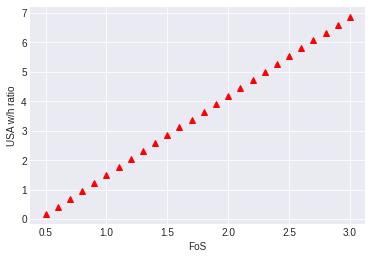

In [9]:
FoS_Range(P=9,FoS_max=3,FoS_min= 0.5, interval= 0.1,formula=[PillarSt_Mark],name= "USA w/h ratio")

       FoS           USA w/h ratio  
------------------ -----------------
               0.7 0.695018951263915
0.7999999999999999 0.963619542185215
0.8999999999999999  1.23222013310652
0.9999999999999999  1.50082072402782
1.0999999999999999  1.76942131494912
               1.2  2.03802190587042
               1.3  2.30662249679172
1.4000000000000001  2.57522308771302
1.5000000000000002  2.84382367863432
1.6000000000000003  3.11242426955562
1.7000000000000004  3.38102486047692
1.8000000000000005  3.64962545139822
1.9000000000000006  3.91822604231952
2.0000000000000004  4.18682663324082
2.1000000000000005  4.45542722416212
2.2000000000000006  4.72402781508342
2.3000000000000007  4.99262840600472
 2.400000000000001  5.26122899692602
 2.500000000000001  5.52982958784732
 2.600000000000001  5.79843017876862


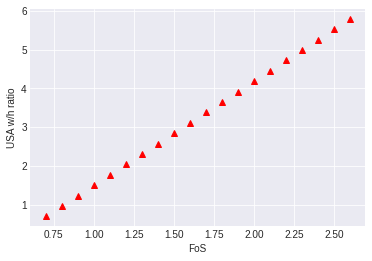

In [10]:
a,b,c=FoS_wh_Range(P=9,FoS_max=3, FoS_min=0.5, interval=0.1,wh_max=6,wh_min=0.5,formula=[PillarSt_Mark],name= "USA w/h ratio")

       FoS           AUS w/h ratio  
------------------ -----------------
               0.6 0.717978561716999
               0.7  1.00565275750016
0.7999999999999999  1.25310129810814
0.8999999999999999  1.47358971182123
0.9999999999999999  1.67438249589275
1.0999999999999999  1.85997058413909
               1.2  2.03336022215367
               1.3  2.19668089933741
1.4000000000000001  2.35150636589367
1.5000000000000002  2.49903869052291
1.6000000000000003  2.64022065162171
1.7000000000000004  2.77580787623991
1.8000000000000005  2.90641705848883


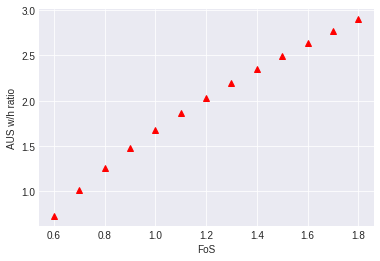

In [11]:
d,e,f=FoS_wh_Range(P=9,FoS_max=3, FoS_min=0.5, interval=0.1,wh_max=3,wh_min=0.5,formula=[PillarSt_CSIRO],name= "AUS w/h ratio")

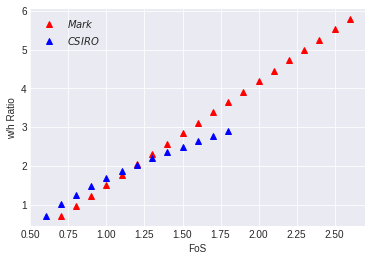

In [12]:
plt.plot(b,c,'r^',label='$Mark$')
plt.plot(e,f,'b^',label='$CSIRO$')
plt.xlabel('FoS')
plt.ylabel('w/h Ratio')
plt.legend()
plt.show()